In [23]:
# Importing libraries
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
# Reading the text file
with open('_w_chat.txt', encoding="utf-8") as f:
    lines = f.readlines()

# Parsing the Text File in a dataframe
date_list = []
name_list = []
message_list = []
for i in lines:
    
    i = i.replace('\u200e',"")
    if i[0] == "[":
        
        # Date List
        start = i.index("[")
        end = i.index("]")
        date_list.append(i[start+1:end])
        
        
        # Name List
        k = i[end+2:]
#         print(k)
        try:
            name_end = k.index(":")
        except:
            name_end=0
#         print(name_end)
        name_list.append(k[0:name_end])
        
        # Message List
        message = k[name_end+2:]
        message = message.replace("\n","")
        message_list.append(message)
        
    else:
        
        date_list.append("")
        name_list.append("")
        i = i.replace("\n","")
        message_list.append(i)
        
# print(date_list)
df1 = pd.DataFrame({"date":date_list,"name":name_list,"message":message_list})
# df1
for i in range(len(df1)):
    if df1.name[i] == "":
       df1["message"][i-1] = df1["message"][i-1] + df1["message"][i]
       df1["message"][i] = df1["message"][i-1]
       df1["name"][i] = df1["name"][i-1]
       df1["date"][i] = df1["date"][i-1]
df2 = df1.drop_duplicates(subset=["date"], keep="last").reset_index(drop=True)

In [24]:
df2["dates"] = df2["date"].str.split(", ").str[0]
df2["time"] = df2["date"].str.split(", ").str[1]
df2["dates"] = pd.to_datetime(df2["dates"], format = "%d/%m/%Y")
df2["time"] = pd.to_datetime(df2["time"], format = "%I:%M:%S %p").dt.strftime('%H:%M:%S')
df2["time"] = pd.to_datetime(df2["time"], format = '%H:%M:%S')
df2["hour"] = df2.time.dt.hour
df2.time = df2.time.dt.time
df2["month"] = df2.dates.dt.month
df2["year"] = df2.dates.dt.year
df2["day_name"] = df2.dates.dt.day_name()
df2['month_year'] = df2.dates.dt.to_period('M')
df3 = df2.copy()
df2

,date,name,message,dates,time,hour,month,year,day_name,month_year
0,"28/11/2015, 9:25:59 AM",HELP GROUP HK#5,Group creator created this group,2015-11-28,09:25:59,9,11,2015,Saturday,2015-11
1,"21/6/2022, 4:26:51 PM",HELP GROUP HK#5,You joined using this group's invite link,2022-06-21,16:26:51,16,6,2022,Tuesday,2022-06
2,"21/6/2022, 5:55:22 PM",~ Saurabh,~ Saurabh joined using this group's invite link,2022-06-21,17:55:22,17,6,2022,Tuesday,2022-06
3,"21/6/2022, 5:40:52 PM",~ Mayur Nayee,Anyone applied US tourist visa from Hong Kong ...,2022-06-21,17:40:52,17,6,2022,Tuesday,2022-06
4,"21/6/2022, 5:41:06 PM",~ Mayur Nayee,Need some info about it,2022-06-21,17:41:06,17,6,2022,Tuesday,2022-06
...,...,...,...,...,...,...,...,...,...,...
6646,"25/1/2024, 4:09:12 PM",~ Girish,Delongi oil heater are effective,2024-01-25,16:09:12,16,1,2024,Thursday,2024-01
6647,"25/1/2024, 4:09:28 PM",~ Girish,Takes a while to heat up but one heated is good,2024-01-25,16:09:28,16,1,2024,Thursday,2024-01
6648,"25/1/2024, 4:29:51 PM",~ ShrutiArsekar,Can these heaters be kept on overnight?,2024-01-25,16:29:51,16,1,2024,Thursday,2024-01
6649,"25/1/2024, 4:30:19 PM",~ Girish,Yes we keep it on no issues,2024-01-25,16:30:19,16,1,2024,Thursday,2024-01


In [25]:
df2.to_csv("help_group.csv")

In [26]:
df3.name.value_counts().head(20)


~ Raghav Rao                 948
~ Shashank Gangil            420
~ Sanjay Surana              310
~ Lakshmi Sagar              258
~ NANDINI KRISHNAN           226
~ Deepti                     184
~ STAY POSITIVE IN LIFE      157
~ Karen Purswaney HK         141
~ Rashmi                     125
~ Senthil Kumar Sellappan    105
~ sunny                       94
~ Sakshi                      92
~ Panna Modi                  85
~ Shravs                      85
~ Siva                        76
~ Dr Deepak iyer              76
~ Umesh Lakhati               71
~ Girish                      56
~ M                           51
~ TJ                          50
Name: name, dtype: int64

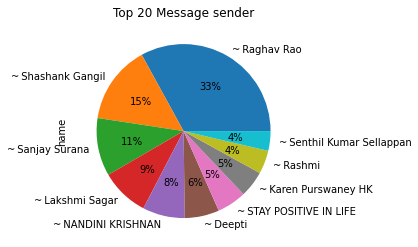

<Figure size 432x288 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
colors = sns.color_palette('pastel')
# df3.name.value_counts().head(20).plot(kind="pie", autopct='%1.0f%%')

plt.ylabel('Total Messages')
plt.title('Top 20 Message sender')

# x = [0, 2, 4, 6]
# y = [1, 3, 4, 8]


# plt.plot(x,y)


# plt.xlabel('x values')
# plt.ylabel('y values')
# plt.title('plotted x and y values')
# plt.legend(['line 1'])
# fig = df3.name.value_counts().head(10).plot(kind='pie',  
#         figsize=(20, 16), fontsize=26).get_figure()
fig = df3.name.value_counts().head(10).plot(kind='pie',autopct='%1.0f%%').get_figure()

fig.savefig('plot1.jpg')

plt.show()
plt.savefig('message_num.jpg')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

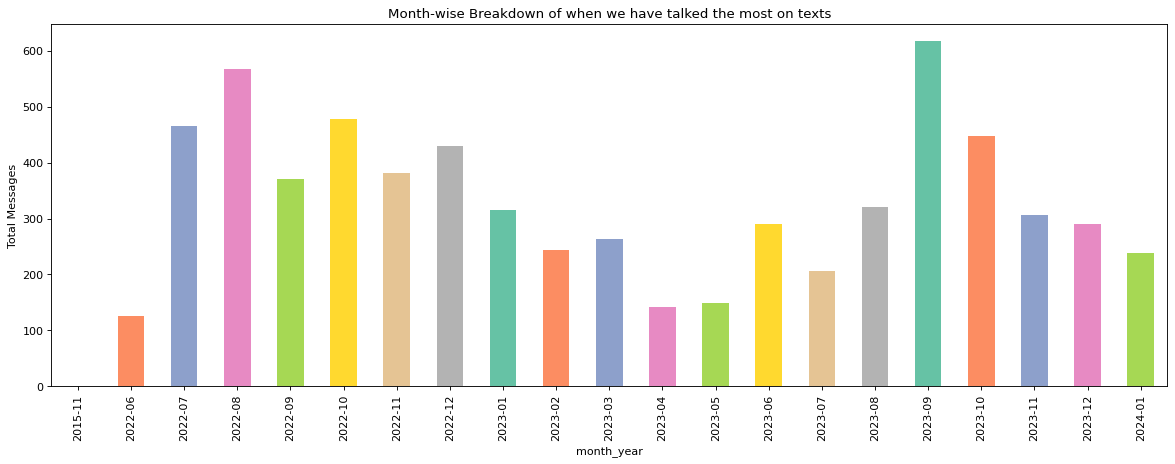

In [28]:
from matplotlib.pyplot import figure
figure(figsize=(18, 6), dpi=80)
fig = df3.groupby(["month_year"]).message.count().plot(kind="bar", color=sns.color_palette('Set2')).get_figure()

plt.ylabel('Total Messages')
plt.title('Month-wise Breakdown of when we have talked the most on texts')
plt.tick_params(axis='x', which='major')
plt.show()
fig.savefig('month_breakdown.jpg')

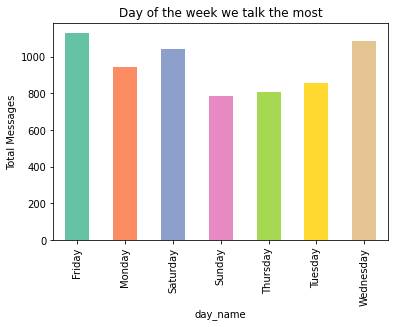

In [29]:
fig = df3.groupby(["day_name"]).message.count().plot(kind="bar", color=sns.color_palette('Set2')).get_figure()
plt.ylabel('Total Messages')
plt.title('Day of the week we talk the most')
plt.show()
fig.savefig('day.png',dpi=100, bbox_inches='tight')

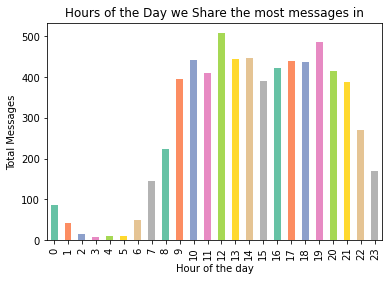

In [30]:
fig= df3.groupby(["hour"]).message.count().plot(kind="bar", color=sns.color_palette('Set2')).get_figure()
plt.ylabel('Total Messages')
plt.xlabel("Hour of the day")
plt.title('Hours of the Day we Share the most messages in')
plt.show()
fig.savefig('hour.jpg')

In [31]:
!pip install wordcloud

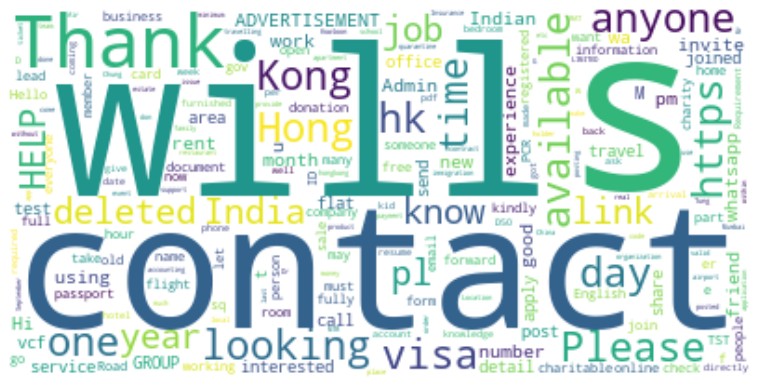

In [32]:
from matplotlib.pyplot import figure
import numpy as np
from PIL import Image
figure(figsize=(12, 10), dpi=80)
# Import the wordcloud library
from wordcloud import WordCloud
# # download a heart vector image with no fill inside
# mask = np.array(Image.open("image.jpeg"))
# # Join the different processed titles together.
# long_string = ','.join(list(doc['clean'].values))
# # Create a WordCloud object
# wordcloud = WordCloud(background_color="white", max_words=3000, contour_width=5,colormap='Set2',mask=mask)
# # Generate a word cloud
# wordcloud.generate(long_string)
# # Visualize the word cloud
# wordcloud.to_image()
text = ''
for m in df2.message:
    text = text+m
words_to_replace = ["group", "attached", "PHOTO",'jpg','help','please','message','need','admin','HK']

for word in words_to_replace:
    text = text.replace(word, " " * len(word))
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
df3

,date,name,message,dates,time,hour,month,year,day_name,month_year
0,"28/11/2015, 9:25:59 AM",HELP GROUP HK#5,Group creator created this group,2015-11-28,09:25:59,9,11,2015,Saturday,2015-11
1,"21/6/2022, 4:26:51 PM",HELP GROUP HK#5,You joined using this group's invite link,2022-06-21,16:26:51,16,6,2022,Tuesday,2022-06
2,"21/6/2022, 5:55:22 PM",~ Saurabh,~ Saurabh joined using this group's invite link,2022-06-21,17:55:22,17,6,2022,Tuesday,2022-06
3,"21/6/2022, 5:40:52 PM",~ Mayur Nayee,Anyone applied US tourist visa from Hong Kong ...,2022-06-21,17:40:52,17,6,2022,Tuesday,2022-06
4,"21/6/2022, 5:41:06 PM",~ Mayur Nayee,Need some info about it,2022-06-21,17:41:06,17,6,2022,Tuesday,2022-06
...,...,...,...,...,...,...,...,...,...,...
6646,"25/1/2024, 4:09:12 PM",~ Girish,Delongi oil heater are effective,2024-01-25,16:09:12,16,1,2024,Thursday,2024-01
6647,"25/1/2024, 4:09:28 PM",~ Girish,Takes a while to heat up but one heated is good,2024-01-25,16:09:28,16,1,2024,Thursday,2024-01
6648,"25/1/2024, 4:29:51 PM",~ ShrutiArsekar,Can these heaters be kept on overnight?,2024-01-25,16:29:51,16,1,2024,Thursday,2024-01
6649,"25/1/2024, 4:30:19 PM",~ Girish,Yes we keep it on no issues,2024-01-25,16:30:19,16,1,2024,Thursday,2024-01


In [34]:
df3 = df3[['date', 'name', 'message', 'dates', 'time', 'hour', 'month', 'year',
       'day_name', 'month_year']]
'''
Importing Necessary libraries
'''
import gensim
import spacy
import string
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
from collections import Counter
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS as stopwords
import spacy
nlp = spacy.load("en_core_web_sm")
df4 = df3.copy()
def listToString(s): 
    str1 = " " 
    # return string  
    return (str1.join(s))
def preprocessing(text):
    result = []
    
    # Removing Stopwords and words with len < 4
    for token in gensim.utils.simple_preprocess(text, min_len=4):
        if not token in list(stopwords) and not token in string.punctuation:
            result.append(token.lower())
    
    result = listToString(result)
    return result
df4["clean"] = 0
for i in range(len(df4)):
    df4["clean"][i] = preprocessing(df4["message"][i]) 
df4 = df4.reset_index(drop=True)
# Removing Multimedia, Sticker messages and Filtering for my mother's messages
doc = df4[(df4.name=="+852 9711 1194") & (df4.message.isin(["video omitted","sticker omitted","document omitted","audio omitted","image omitted","GIF omitted"])==False)]
w = Counter(" ".join(doc["clean"]).split()).most_common(20)
x = []
y = []
for i in w:
    x.append(i[0])
    y.append(i[1])
    
plt.bar(x,y, color=colors)
plt.xticks(rotation=90,fontsize=14)
plt.title("Most used words by Amma")
plt.ylabel("Number of Occurences")

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

<Figure size 640x480 with 0 Axes>

In [ ]:
# !pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = df3['message'].values 
x, y = np.ogrid[:300, :300]
stop_words = ["https", "group","joined","using","u202c"] + list(STOPWORDS)
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)
wordcloud = WordCloud(background_color="white",width = 500,
                      height = 200, stopwords=stop_words).generate(str(text))
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('wordcloud.jpg')

In [ ]:
x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [ ]:
import matplotlib
from pylab import title, figure, xlabel, ylabel, xticks, bar, legend, axis, savefig
from fpdf import FPDF
# !pip install fpdf

In [ ]:
pdf = FPDF()
pdf.add_page()
pdf.set_xy(0, 0)
pdf.set_font('arial', 'B', 12)
pdf.cell(60)
pdf.cell(75, 10, " Hong Kong Help Group Chat messages analysis", 0, 2, 'C')
# pdf.cell(90, 10, " ", 0, 2, 'C')
# pdf.cell(-40)
# pdf.cell(50, 10, 'Question', 1, 0, 'C')
# pdf.cell(40, 10, 'Charles', 1, 0, 'C')
# pdf.cell(40, 10, 'Mike', 1, 2, 'C')

pdf.set_font('arial', '', 12)
# for i in range(0, len(df)):
#     pdf.cell(50, 10, '%s' % (df['Question'].iloc[i]), 1, 0, 'C')
#     pdf.cell(40, 10, '%s' % (str(df.Mike.iloc[i])), 1, 0, 'C')
#     pdf.cell(40, 10, '%s' % (str(df.Charles.iloc[i])), 1, 2, 'C')
#     pdf.cell(-90)
# pdf.cell(90, 10, " ", 0, 2, 'C')
pdf.cell(-30)
# pdf.image('plot1.jpg', x = None, y = None, w = 0, h = 0, type = '', link = '')
pdf.image('plot1.jpg', x = None, y = None, w = 0, h = 0, type = '', link = '')
pdf.cell(-10)
pdf.image('day.png', x = None, y = None, w = 0, h = 0, type = '', link = '')

pdf.cell(75, 10, " Hong Kong Help Group Chat messages analysis", 0, 2, 'C')
pdf.image('hour.jpg', x = None, y = None, w = 0, h = 0, type = '', link = '')
# pdf.cell()
pdf.cell(90, 10, " ", 0, 2, 'C')
pdf.cell(90, 10, " Messages Word Cloud ", 0, 2, 'C')
pdf.cell(90, 10, " ", 0, 2, 'C')
pdf.image('wordcloud.jpg')
pdf.output('test.pdf', 'F')# pdf.cell(-90)

### 